# Анализ популярности игр

**Описание проекта**

Интернет-магазин «Стримчик» - продаёт по всему миру компьютерные игры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Задача: Нужно выявить определяющие успешность игры закономерности.**

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Импорт библиотек и данных анализ общей информации

In [1]:
pip install missingno # библиотека по визуализации пропусков

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from pylab import rcParams
from scipy import stats as st
# Настройка отображения размера графиков
rcParams['figure.figsize'] = 18, 8

In [3]:
# присвоим переменную и прочитаем данные
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим есть пропущенные значения, рассмотрим данные подробней:

In [4]:
df.info() #изучим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print('ПРОПУСКИ В СТОЛБЦАХ:')
df.isna().sum().sort_values()

ПРОПУСКИ В СТОЛБЦАХ:


Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

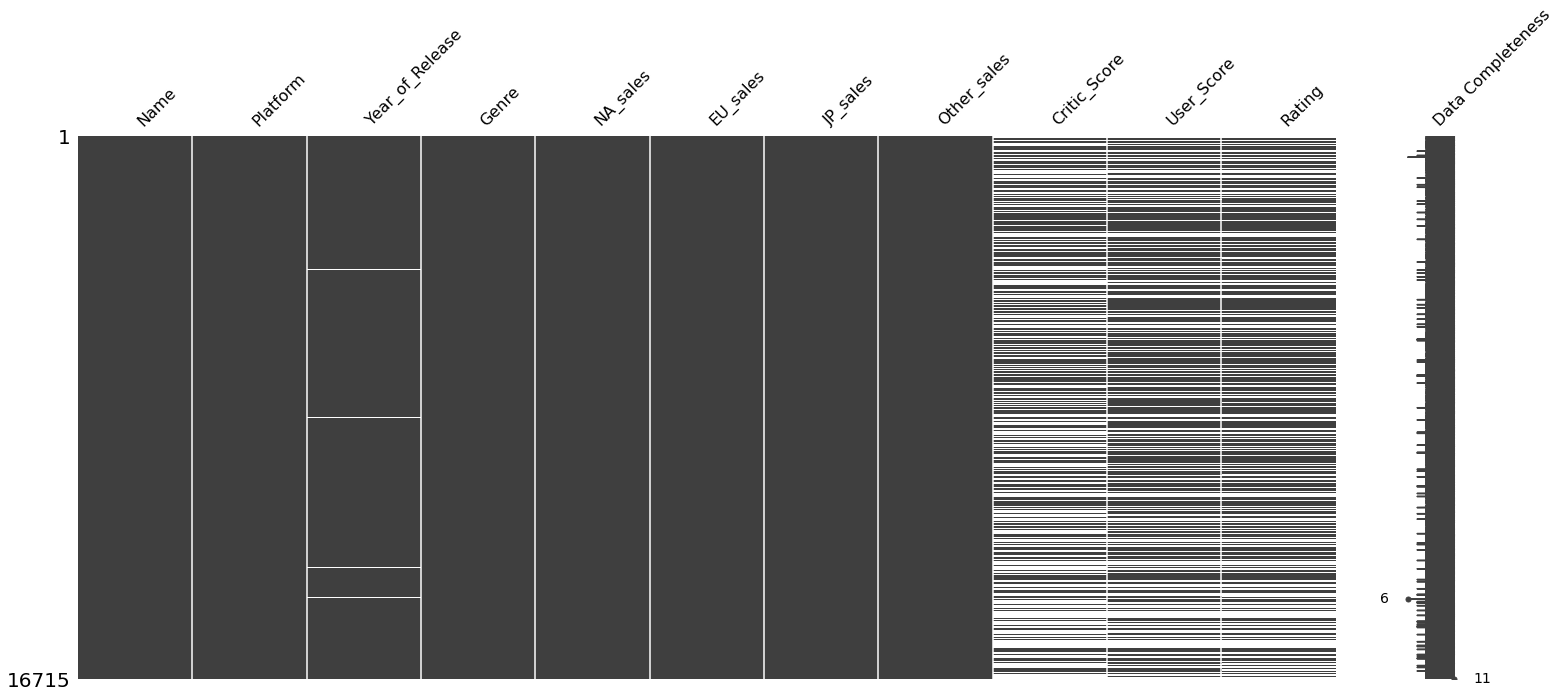

In [6]:
# выведем визуализацию пропусков в столбцах
msno.matrix(df, labels=True);

Заметим, что на графике не видно, что в cтолбцах name и genre есть пропуски

**Вывод:** 16715 строк × 11 столбцов в которых:

Есть проблемы, где

1. Имеем пропущенные значения в столбцах :

    1. Name                  2
    2. Year_of_Release     269 - некорректный тип, должен быть целочисленный
    3. Critic_Score       8578
    4. User_Score         6701 - некорректный тип, должен быть с плавающей точкой
    5. Rating             6766
    6. Genre                 2

2. Имеем два типа данных строки и числа с плавающей точкой.
3. Имеем разнорегистровое наименование столбцов

### Подготовка данных к анализу

1. Преобразование названий столбцов к нижнему регистру


2. Преобразуйте данные в нужные типы.

    2.1 Опишите, в каких столбцах заменили тип данных и почему;

    2.2 Обработайте пропуски при необходимости:

        Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

        Опишите причины, которые могли привести к пропускам;

        Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. 

        Отдельно разберите это значение и опишите, как его обработать;

3. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### Преобразование названий столбцов к нижнему регистру

In [7]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Преобразование данных в нужные типы и обработка пропусков


##### year_of_release на int и замена пропущенных значений

In [8]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

**Рассмотрим столбец year_of_release на графике:**

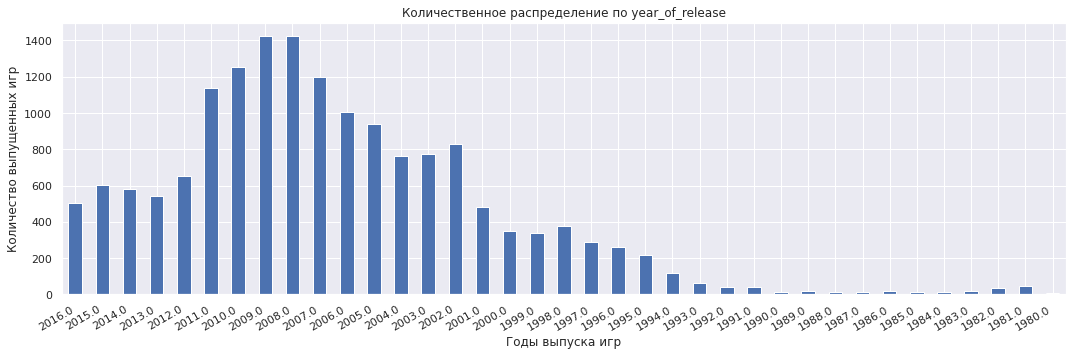

In [9]:
sns.set()
(df['year_of_release']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(xlabel='Годы выпуска игр',
      ylabel='Количество выпущенных игр',
     title='Количественное распределение по year_of_release')
);
plt.xticks(rotation=30, horizontalalignment='right');



In [10]:
# Заменим значения nan на 0 и тип данных на int
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

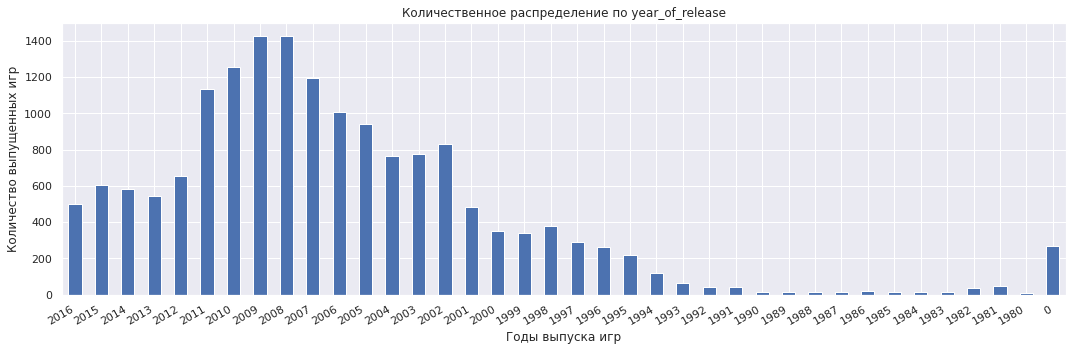

In [11]:
# Проверим как прошла замена на графике:
sns.set()
(df['year_of_release']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(xlabel='Годы выпуска игр',
      ylabel='Количество выпущенных игр',
      title='Количественное распределение по year_of_release')
);
plt.xticks(rotation=30, horizontalalignment='right');

Замена типа данных и значений nan на 0 прошла удачно,

на графике расписаны годы целыми числами и появился столбец 0 где 269 значений

In [12]:
print('ПРОПУСКИ В СТОЛБЦАХ:')
df.isna().sum().sort_values()

ПРОПУСКИ В СТОЛБЦАХ:


platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
user_score         6701
rating             6766
critic_score       8578
dtype: int64

##### critic_score  Заменим значения nan на 0 и тип данных на int

In [13]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

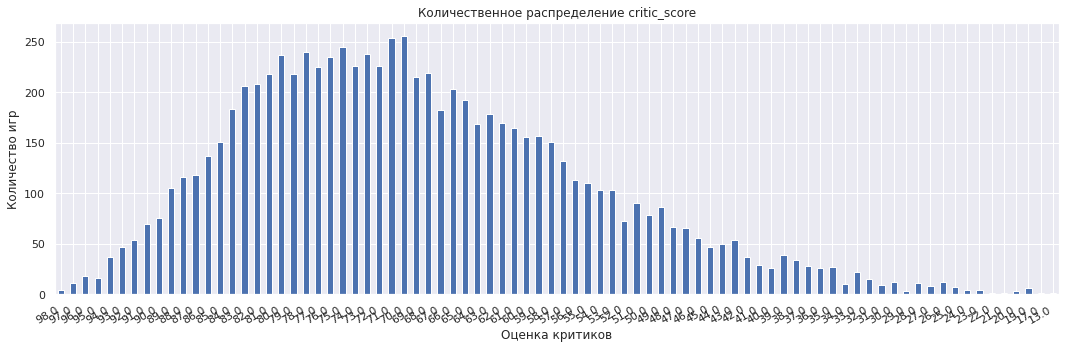

In [14]:
sns.set()
(df['critic_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(xlabel='Оценка критиков',
      ylabel='Количество игр', title='Количественное распределение critic_score')
);
plt.xticks(rotation=30, horizontalalignment='right');

In [15]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

**Заменим данные пока на 0, потому что больше половины значений это nan,**

**нельзя их удалить или заменить на среднее или медианну т.к это сильно повлияет на данные**

In [16]:
# Заменим значения nan на 0 и тип данных на int
df['critic_score'] = df['critic_score'].fillna(0).astype(int)

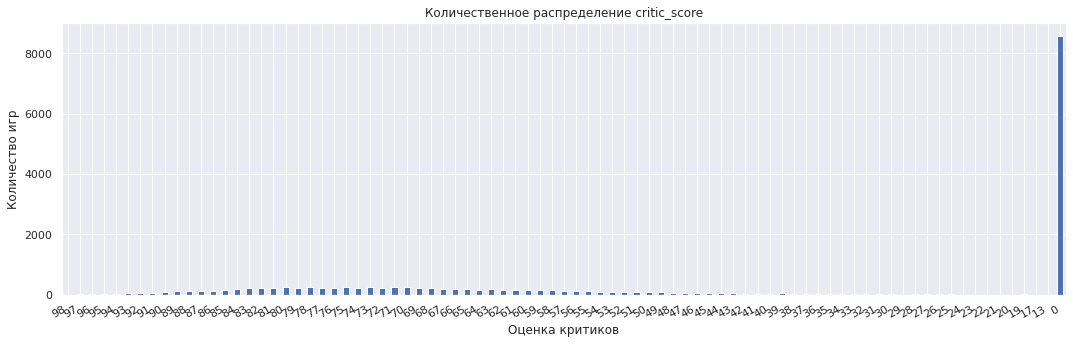

In [17]:
sns.set()
(df['critic_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(xlabel='Оценка критиков',
      ylabel='Количество игр', title='Количественное распределение critic_score')
);
plt.xticks(rotation=30, horizontalalignment='right');

# Нормальное распределение данных ушло... Но пока оставим так

In [18]:
df['critic_score'].describe()

count    16715.000000
mean        33.574035
std         35.818235
min          0.000000
25%          0.000000
50%          0.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

In [19]:
print('ПРОПУСКИ В СТОЛБЦАХ: Количество:')
df.isna().sum()

ПРОПУСКИ В СТОЛБЦАХ: Количество:


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6701
rating             6766
dtype: int64

##### user_score  Замена значений tbd и nan на 0 и перевод в тип float

In [20]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.9       2
0.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Самое большое значение tbd - из интернета узнали что это такое, а именно:

"Отсутствие рейтинга или tbd означает не более чем, что издатель не захотел получать рейтинговую оценку ESRB"

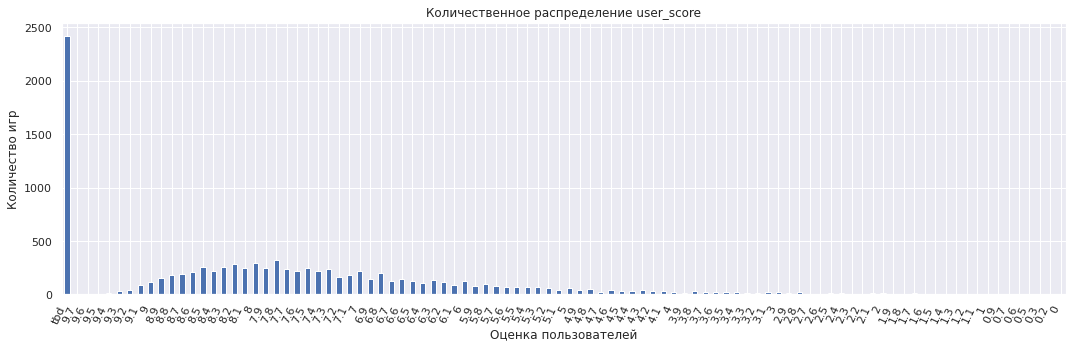

In [21]:
sns.set()
(df['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(xlabel='Оценка пользователей',
      ylabel='Количество игр', title='Количественное распределение user_score')
);
plt.xticks(rotation=65, horizontalalignment='right');

Пик находится на tbd, рассмотрим распределение оценок без учёта tbd:

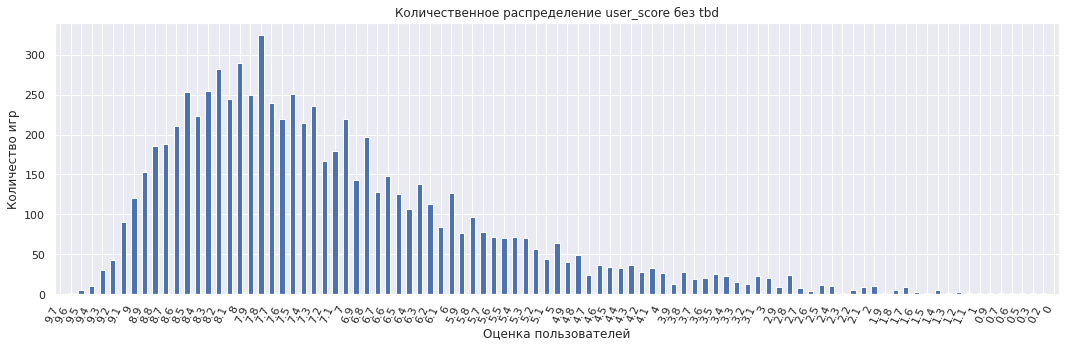

In [22]:
(df[df['user_score'] != 'tbd']['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(xlabel='Оценка пользователей',
      ylabel='Количество игр', title='Количественное распределение user_score без tbd')
);
plt.xticks(rotation=65, horizontalalignment='right');

Распределение оценок напоминает - нормальное распределение с положительным "хвостом"

Возможно придется удалить значения tbd, но пока сохраним их как 0

In [23]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [24]:
# Замена значений tbd и nan на 0
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0
df['user_score'].fillna('0', inplace=True)

#перевод в тип float
df['user_score'] = pd.to_numeric(df['user_score'], errors='raise')
df['user_score'].describe()

count    16715.000000
mean         3.235363
std          3.688755
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

In [25]:
print('ПРОПУСКИ В СТОЛБЦАХ: Количество:')
df.isna().sum()

ПРОПУСКИ В СТОЛБЦАХ: Количество:


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

##### rating замена nan на NOR

In [26]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Расшифровка из интернета:

E - Все

Е 10+ – Все в возрасте 10+

T - подросток

M – Зрелые (17+)

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

EC («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.

RP (вероятно для взрослых 17+) – Оценка ожидается, но контент, скорее всего, предназначен для людей старше 17 лет.

K-A - Kids to Adults Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

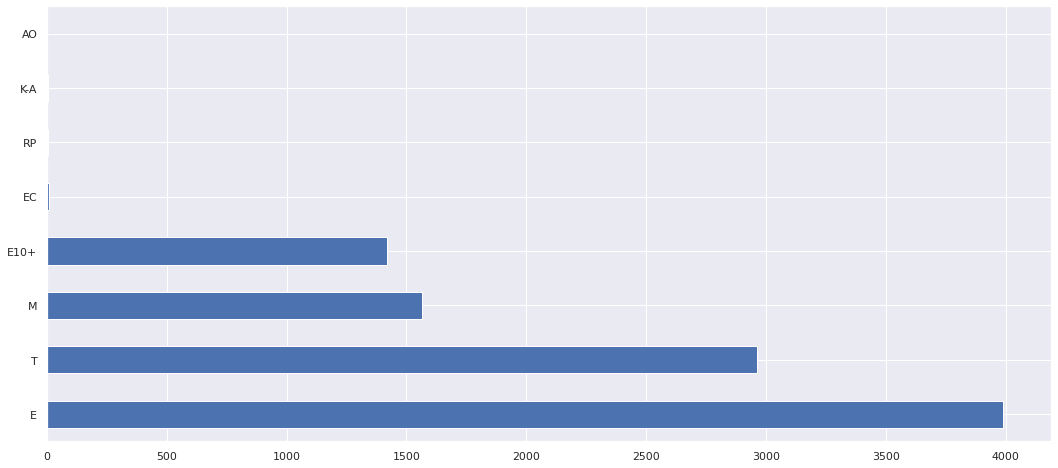

In [27]:
df['rating'].value_counts().plot(kind='barh');

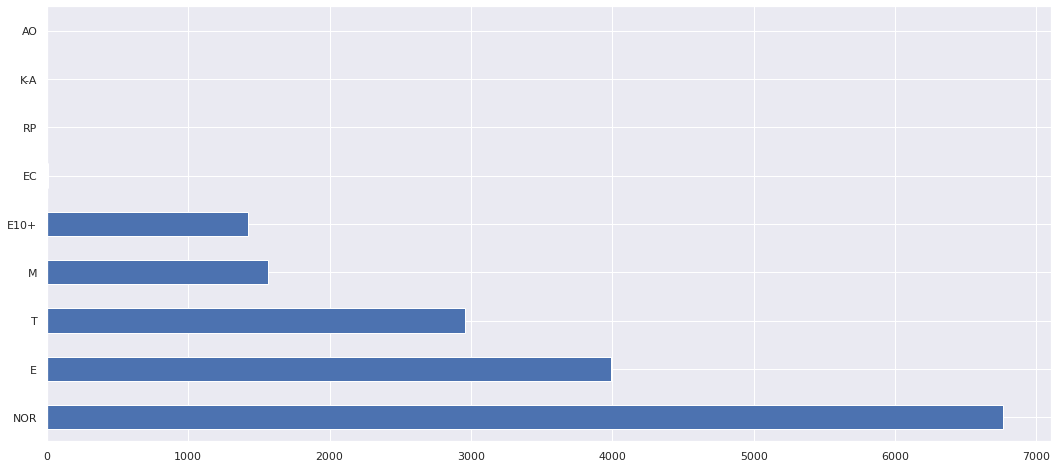

In [28]:
# Замением пропущенные значения на NOR (нет рейтинга)
df['rating'].fillna('NOR', inplace=True)
df['rating'].value_counts().plot(kind='barh');

In [29]:
print('ПРОПУСКИ В СТОЛБЦАХ: Количество:')
df.isna().sum()

ПРОПУСКИ В СТОЛБЦАХ: Количество:


name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

##### genre name удаление пропущенных значений

In [30]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [31]:
# Заменим пропущенные значения на Z
df['genre'].fillna('Z', inplace=True)
df[df['genre'] == 'Z']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,Z,1.78,0.53,0.00,0.08,0,0.0,NOR
14244,NaN,GEN,1993,Z,0.00,0.00,0.03,0.00,0,0.0,NOR


Не знаю на что можно заменить название и жанр, но они повторяются в имени, также нет рейтинга и оценки... Лучше будет удалить эти значения.

In [32]:
# Удалим строки методом drop
df = df.drop([659,14244])
# Проверим удаление
df[df['genre'] == 'Z']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [33]:
print('ПРОПУСКИ В СТОЛБЦАХ: Количество:')
df.isna().sum()

ПРОПУСКИ В СТОЛБЦАХ: Количество:


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Мы избавилиь от пропусков, но у нас много значений с O которые в дальнейшем могут исказить данные...

#### Отдельный столбец с суммой продаж по всем регионам 'sales_total':

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

In [35]:
# Отдельный столбец с суммой продаж по всем регионам 'sales_total'
df['sales_total'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NOR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NOR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NOR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NOR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NOR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NOR,0.01


Был создан новый столбец 'sales_total'с суммой продаж по всем регионам

#### Поиск и обработка дубликатов

In [36]:
# поиск явных дубликатов
df.duplicated().sum()

0

Дубликаты не выявлены по всей таблице, рассмотрим по столбцам:

In [37]:
df['name'].duplicated().sum()

5154

Названия игра могут быть одинаковыми, но год и платформа разные

Посмотрим сразу по нескольким столбцам где могут быть неявные дубликаты

In [38]:
display(df.loc[df.duplicated(['name', 'platform', 'year_of_release'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01


In [39]:
# удалим именно строку 16230, т.к если использовать first, 
# то удалится первая строка где более хорошие данные с минимальным количеством 0
df = df.drop([16230])
# проверим
display(df.loc[df.duplicated(['name', 'platform', 'year_of_release'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total


Нашли и избавились от дубликатов

#### Обший вывод по этапу подготовки данных к анализу
    
    Все пропуски обработанны:

1. Строки с пропуском имени были удаленны, так же как и строки с пропуском жанра.
2. Пропуски в столбце rating были замененны на NOR, что означает что рейтинга нет или пока нет.
3. Пропуски в столбцах critic_score и user_score были заменены на нулевые, что означает, что нет оценки.
4. Пропуски в столбце year_of_release заменены на 0.
5. Типы данных в столбцах были изменены там где это нужно.
6. Создан новый столбец 'sales_total'с суммой продаж по всем регионам.
7. Найдены и удалены дубликаты

### Проведите исследовательский анализ данных

3.1 Посмотрите, сколько игр выпускалось в разные годы.

    Важны ли данные за все периоды?

3.2 Посмотрите, как менялись продажи по платформам.

    Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

3.3 За какой характерный срок появляются новые и исчезают старые платформы?

    Возьмите данные за соответствующий актуальный период. 

    Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. 

    Основной фактор — эти данные помогут построить прогноз на 2017 год.

    Не учитывайте в работе данные за предыдущие годы.

    Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


3.4 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

    Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

3.5 Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

    Сформулируйте выводы.

3.6 Соотнесите выводы с продажами игр на других платформах.

    Посмотрите на общее распределение игр по жанрам.

    Что можно сказать о самых прибыльных жанрах?

    Выделяются ли жанры с высокими и низкими продажами?



#### Cколько игр выпускалось в разные годы.

In [40]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [41]:
#избавимся от 0
df = df[df['year_of_release']!=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sales_total      16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


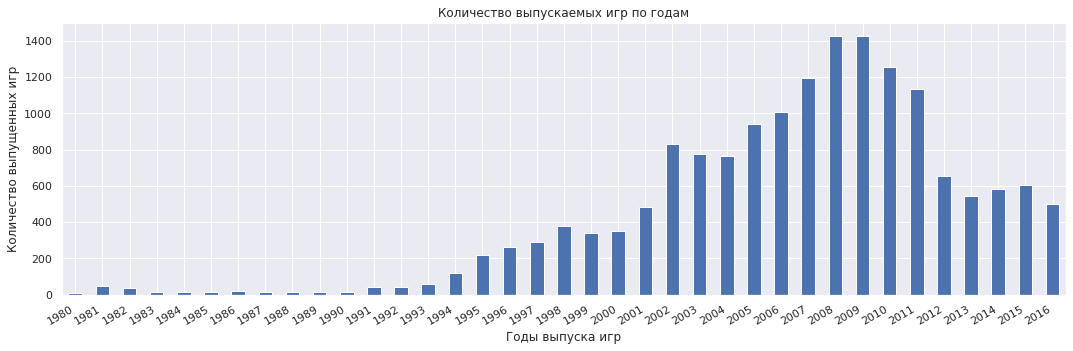

In [42]:
sns.set()
(df['year_of_release']
 .value_counts()
 .sort_index(ascending=True)
 .plot(kind='bar' ,figsize=(18,5))
 .set(xlabel='Годы выпуска игр',
      ylabel='Количество выпущенных игр',
     title='Количество выпускаемых игр по годам')
);
plt.xticks(rotation=30, horizontalalignment='right');

**Важны ли данные за все периоды?**

Мир игр меняется резко и быстро. 

Качество игр становится лучше с каждым годом.

Поэтому ответ Нет, нужно взять актуальные данные.

По графику видно, что с 1991 года до 1999 идет положительная тенденция по количеству выпуска игр.

Далее с 2000 идет снова скачок выпуска игр и достигает своего максимума в 2008 и 2009 годах.

После в 2010 году идет убывание и в 2012 почти на половину меньше выпускается игр и так до 2013 года.

Уже в 2014 идет положительная тенденция до 2015 года,

В 2016 году тенденция идет чуть ниже на спад.

Актуальны будут данные начиная с 2014 года

#### Посмотрите, как менялись продажи по платформам.

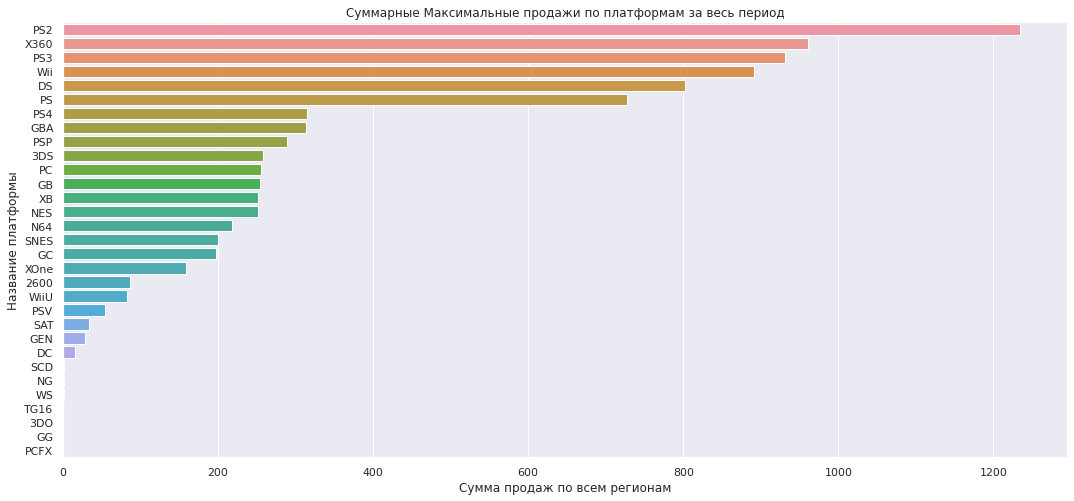

In [43]:
sns.barplot(x="sales_total", 
    y="platform",
    data=df.groupby('platform').sum()[['sales_total']].reset_index().sort_values(by='sales_total', ascending=False)).set(xlabel='Сумма продаж по всем регионам',
                 ylabel='Название платформы',
                 title='Суммарные Максимальные продажи по платформам за весь период');

In [44]:
sales_total_top = df.groupby('platform').sum()[['sales_total']].reset_index().sort_values(by='sales_total', ascending=False)
sales_total_top.head(12)

,platform,sales_total
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


ТОП 12 компаний получивших максимальные продажи за весь период выпуска игр:

1.	PS2	
2.	X360 
3.	PS3	
4.	Wii	
5.	DS	
6.	PS	
7.	PS4	
8.	GBA	
9.	PSP	
10.	3DS	
11.	PC	
12.	GB

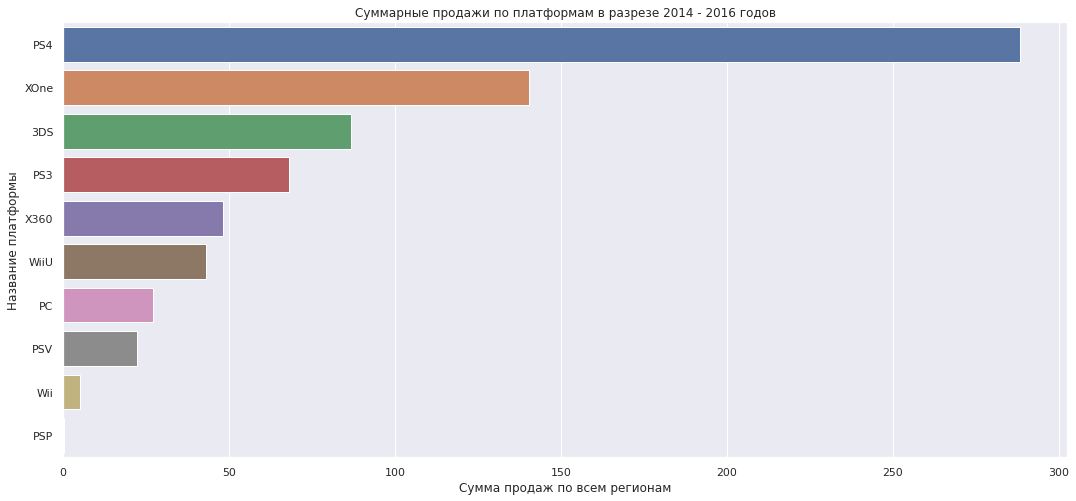

In [45]:
# Теперь рассмотрим Продажи игр по платформам, но за последниие 3 года
data=df[df['year_of_release'] >= 2014]

sns.barplot(x="sales_total", 
    y="platform",
    data=data.groupby('platform').sum()[['sales_total']].reset_index().sort_values(by='sales_total', ascending=False)).set(xlabel='Сумма продаж по всем регионам',
                 ylabel='Название платформы',
                 title='Суммарные продажи по платформам в разрезе 2014 - 2016 годов');

Из 31 платформ остались 10, 21 платформа уже перестали выпускать игры к 2014 году.

с каждым годом платформ становится все меньше и меньше, а продажи также имеют тенденцию снижаться.

За последние 3 года, осталось только 10 платформ.


Из них по рейтингу:

1.	PS4
2.	XOne
3.	3DS		
4.	PS3	
5.	X360 	
6.	WiiU	
7.	PC	
8.	PSV	
9.	Wii	
10.	PSP

Из топ 12 платформ всего периода перестали быть популярными и перестали выпускать игры в актуальном периоде:

1.	PS2
5.  DS
6.	PS		
8.	GBA		
12.	GB


Возьмем первые 7 платформ как топ по актуальному периоду.

#### За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. 

Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. 

Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [46]:
# Рассмотрим какой срок жизни у каждой платформы
lifespan_platform = (df.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
lifespan_platform.sort_values(by='year_of_release', ascending=False)

,year_of_release
platform,
PC,26
GB,13
NES,12
X360,12
PSP,12
PS2,12
Wii,11
DS,11
PS3,11


PC живет уже 26 лет и продолжает выпускать игры!))))

In [47]:
lifespan_platform.describe()

,year_of_release
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


В среднем платформы живут 7 лет. 

Максимальный срок жизни платформ 26 лет

75% платформ живут примерно 11 лет

50% платформ живут примерно 7 лет

25% платформ живут примерно 4 года

Минимальный срок жизни платформы 1 год

#### Из пункта 3.2 мы выяснили что актуальный период можно считать 2014-2016 года, т.е ближайшие 3 года, т.к индустрия игр изменяется с каждым годом. Перспективными платформами являются PS4, PS3, XOne, X360, WiiU, 3DS, PC

Поготовим данные с помощью фильтрации:

Взял на заметку, спасибо!

In [48]:
platform_top = df.query('year_of_release >= 2014 & platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS", "PC"]')
platform_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,NOR,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,NOR,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,NOR,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,0,0.0,NOR,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NOR,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NOR,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01


In [49]:
platform_top.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,2014.964234,0.203985,0.193109,0.057073,0.057964,35.046715,3.875985,0.512131
std,0.801408,0.487346,0.511457,0.232225,0.155490,37.184387,3.435929,1.154466
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
50%,2015.000000,0.040000,0.040000,0.000000,0.010000,0.000000,4.900000,0.130000
75%,2016.000000,0.170000,0.150000,0.040000,0.040000,73.000000,7.100000,0.450000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Опишите результат.


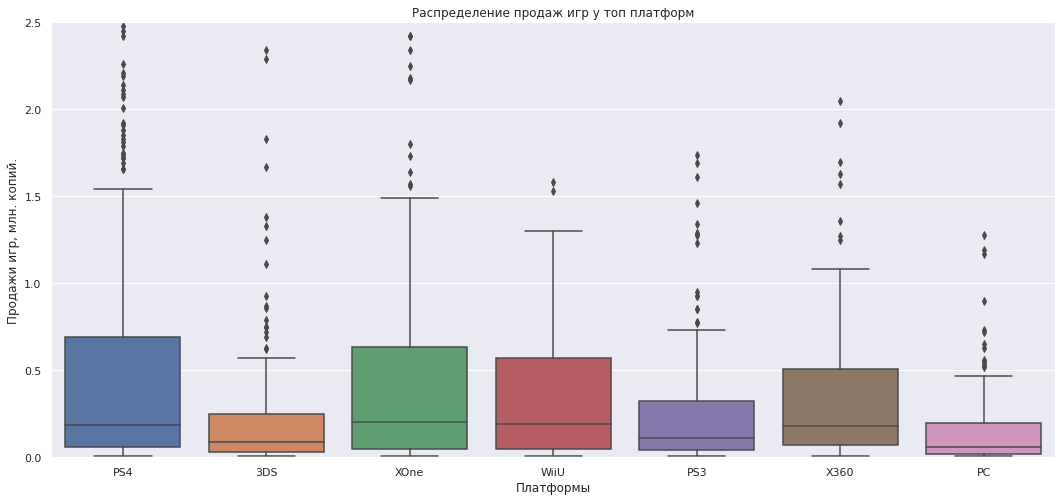

In [50]:
ax = sns.boxplot(x='platform', y='sales_total', data=platform_top)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Продажи игр, млн. копий.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у топ платформ')
plt.show()

Высокое значение медианы у платформ Xone, WiiU, X360, PS4 также PS4 ящик является самым большим.

Больше всего выбросов - максимальных продаж у PS4, можно предположить, что это самая продаваемая платформа в актуальном периоде

Меньше всего медианное значение у PS3, PС, 3DS, но много выбросов, что говорит, что есть игры которые дают многомиллионные продажи копий.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  

    Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
    
    Сформулируйте выводы.

    Соотнесите выводы с продажами игр на других платформах.

Выберем платформу PS4

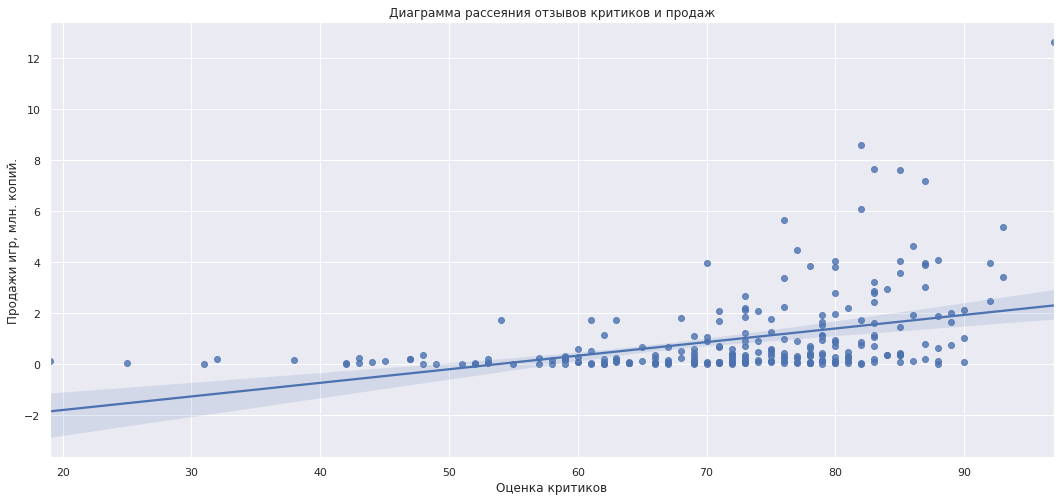

In [51]:
# За весь период и отзывы больше нуля
platform_ps4 = df[(df['platform'] == 'PS4') & (df['user_score'] > 0) & (df['critic_score'] > 0)].copy()

ax = sns.regplot(x='critic_score', y='sales_total', data=platform_ps4)
ax.set_ylabel('Продажи игр, млн. копий.')
ax.set_xlabel('Оценка критиков')
ax.set_title('Диаграмма рассеяния отзывов критиков и продаж');

С увеличением рейтинга критиков увеличивается и средний уровень продажи игр, что логично:
    
    чем качественнее игра, тем больше денег она приносит разработчику и издателю.

Теперь от отзывов пользователей:

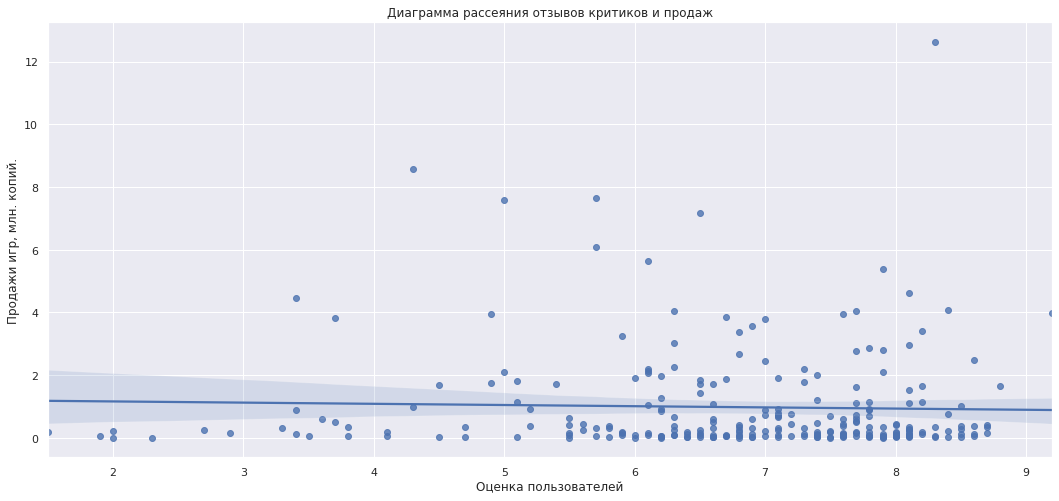

In [52]:
# За весь период и критикой от пользователей

ax = sns.regplot(x='user_score', y='sales_total', data=platform_ps4)
ax.set_ylabel('Продажи игр, млн. копий.')
ax.set_xlabel('Оценка пользователей')
ax.set_title('Диаграмма рассеяния отзывов критиков и продаж');

Связь ниже, но больше выбросов, раскупают хорошо даже те игры, где оценка ниже 5. 

Видимо была хорошая рекламная компания

Рассмотрим на средние значения отзывов по топ платформам:

In [53]:
platform_top.groupby('platform')[['user_score', 'critic_score']].agg('mean').round(2)

,user_score,critic_score
platform,,
3DS,1.85,16.59
PC,5.09,58.55
PS3,2.69,10.94
PS4,4.39,45.49
WiiU,4.66,41.93
X360,4.32,14.93
XOne,4.77,50.17


Средние значения не сильно различаются друг от друга

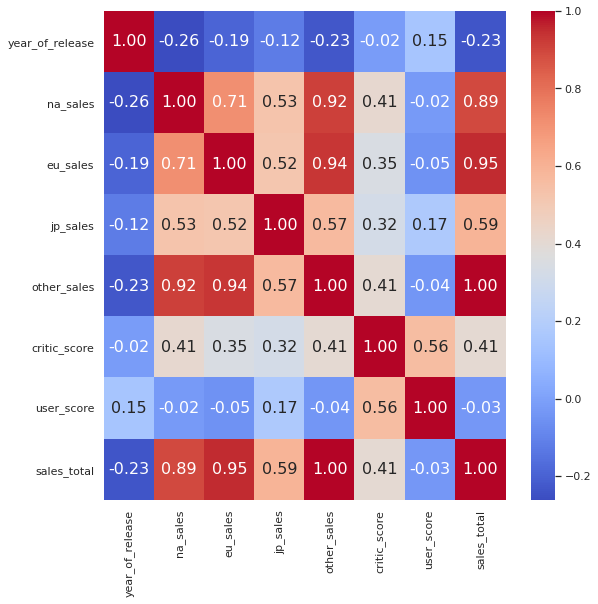

In [54]:
# Матрица корреляции
plt.figure(figsize=(9,9))
sns.heatmap(platform_ps4.corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            annot_kws={'size':16});

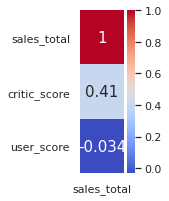

In [55]:
# фильтр для корреляции
platform_ps4_filtr = platform_ps4[['sales_total' ,'critic_score', 'user_score']]

plt.figure(figsize=(1,3))
sns.heatmap(platform_ps4_filtr.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="coolwarm", 
            annot=True, annot_kws={'size':15});

Больше всего влияет оценка критиков 0.43, меньше всего даже отрицательно оценка пользователей -0.03

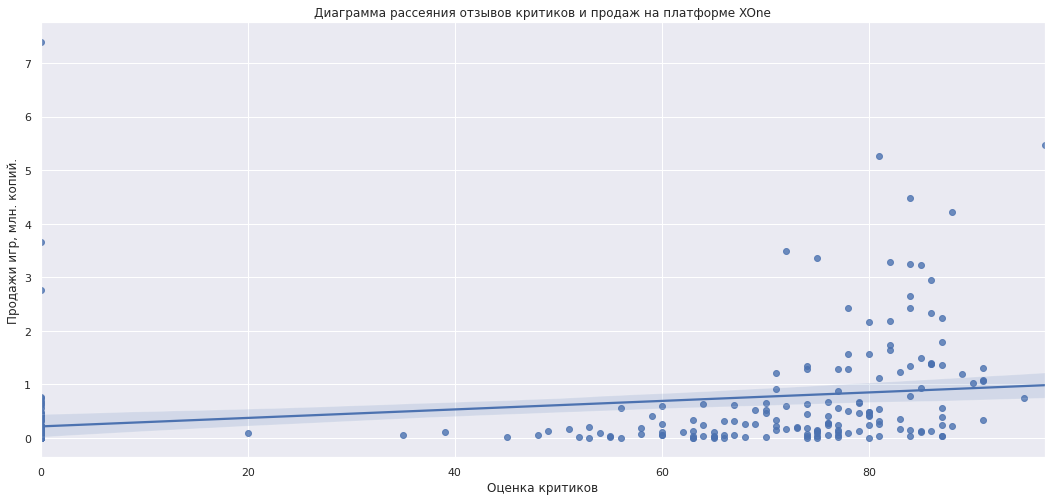

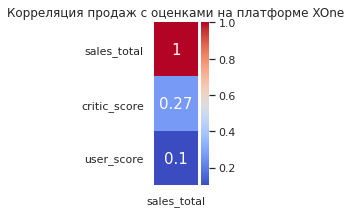

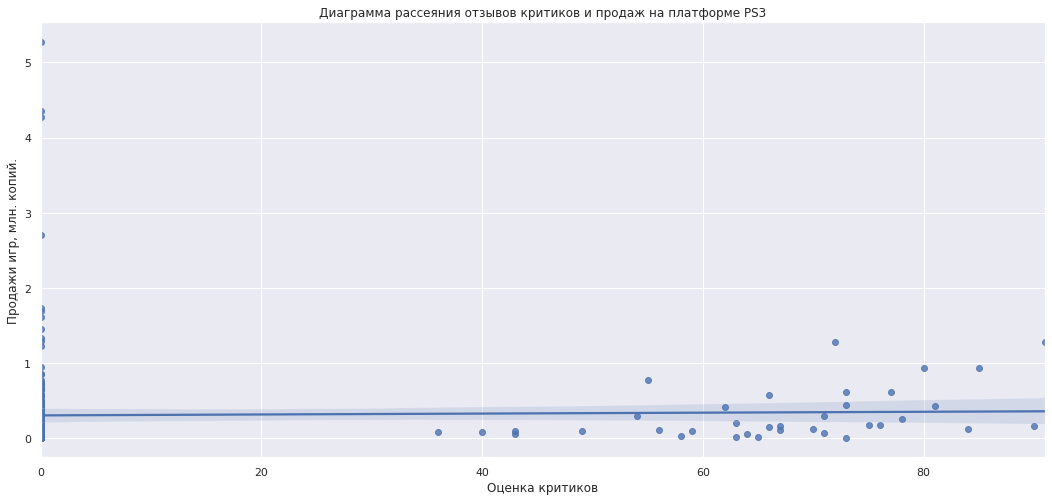

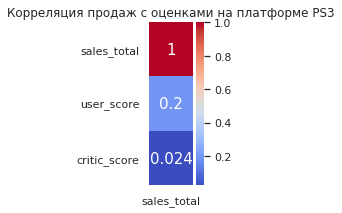

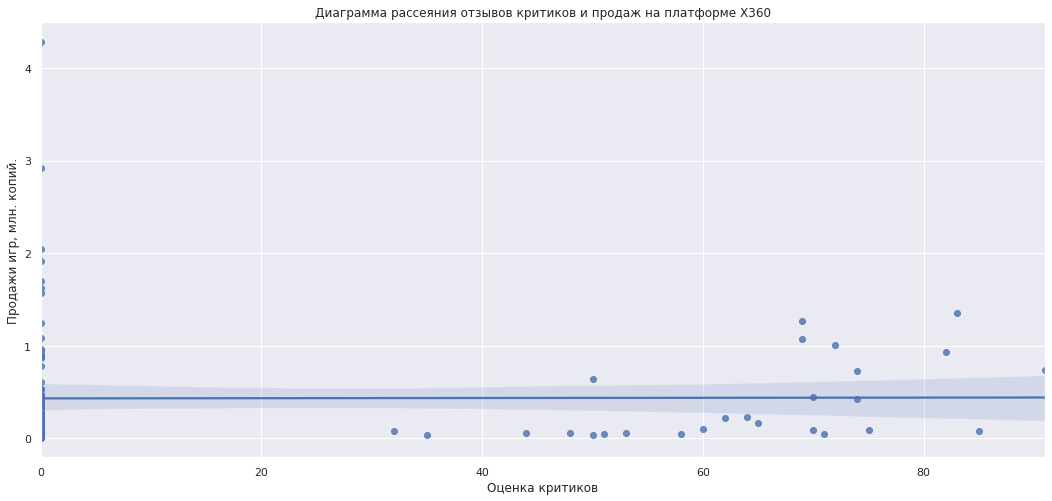

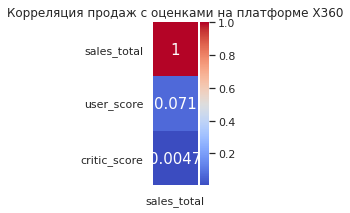

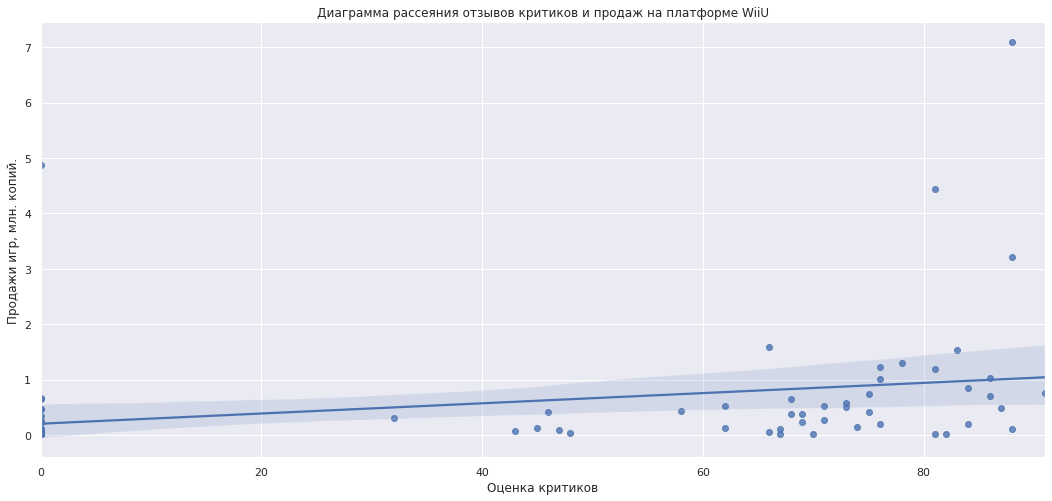

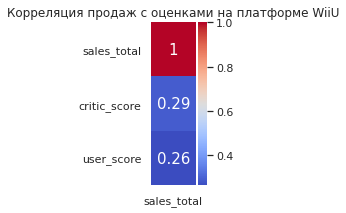

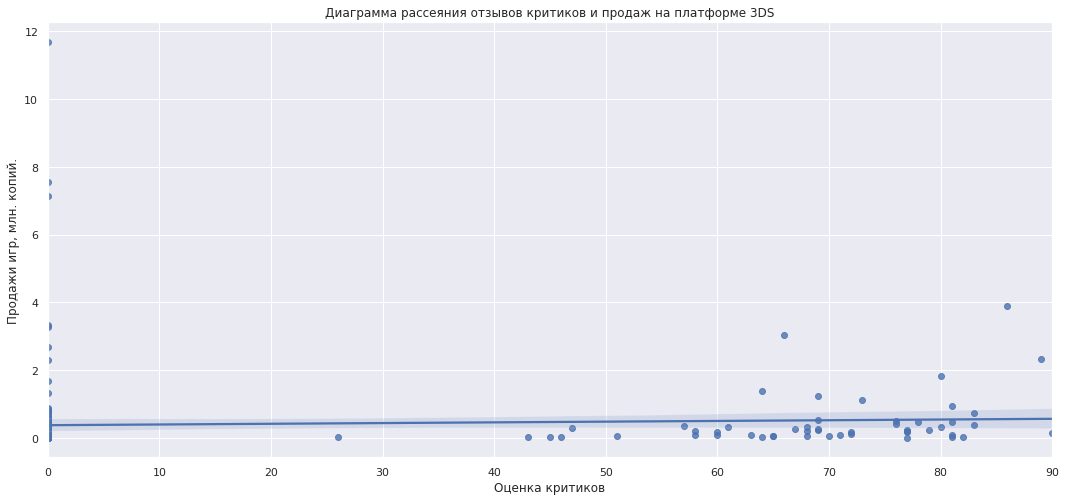

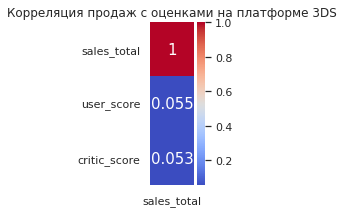

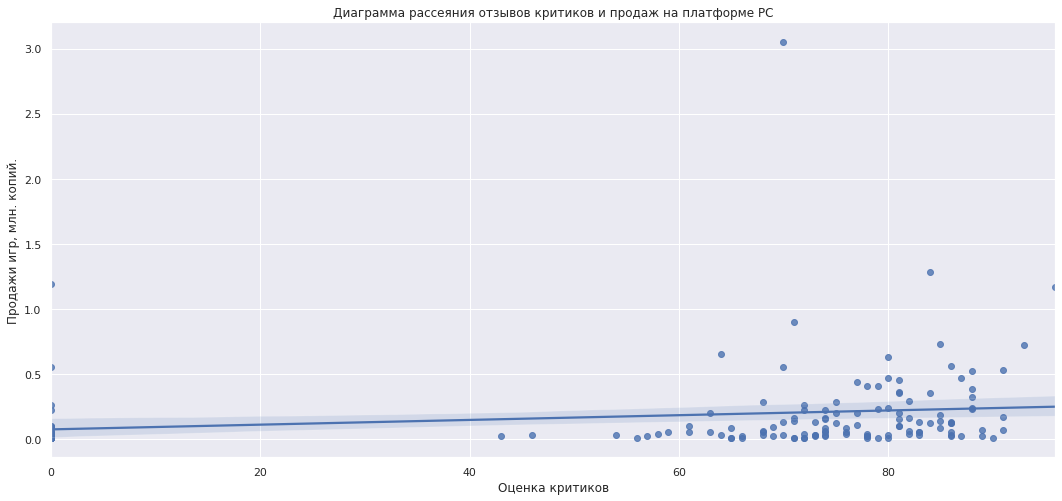

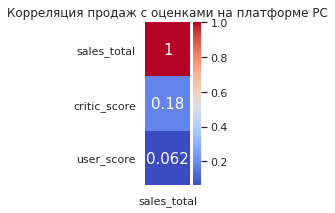

In [56]:
# Построим график зависимости и рассчитаем коэффициенты корреляции для нескольких топ платформ через цикл for

top_platforms = ["XOne", "PS3", "X360", "WiiU", "3DS", "PC"]

for platform in top_platforms:
    data = platform_top.query('platform == @platform')[['sales_total','user_score', 'critic_score']]
    
    
    ax = sns.regplot(x='critic_score', y='sales_total', data=data)
    ax.set_ylabel('Продажи игр, млн. копий.')
    ax.set_xlabel('Оценка критиков')
    ax.set_title(f'Диаграмма рассеяния отзывов критиков и продаж на платформе {platform}')
    
    plt.show()
    
    plt.figure(figsize=(1,3))
    sns.heatmap(data.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="coolwarm", 
            annot=True, annot_kws={'size':15}).set_title(f'Корреляция продаж с оценками на платформе {platform}')
    plt.show()

У остальных платформ тоже корреляция меньше 0.3 или даже меньше 0.1

Но у платформы WiiU показатели корреляции критиков и пользователей примерно одинаковы 0.29 и 0.26 соответственно

#### Посмотрите на общее распределение игр по жанрам.

    Что можно сказать о самых прибыльных жанрах?

    Выделяются ли жанры с высокими и низкими продажами?

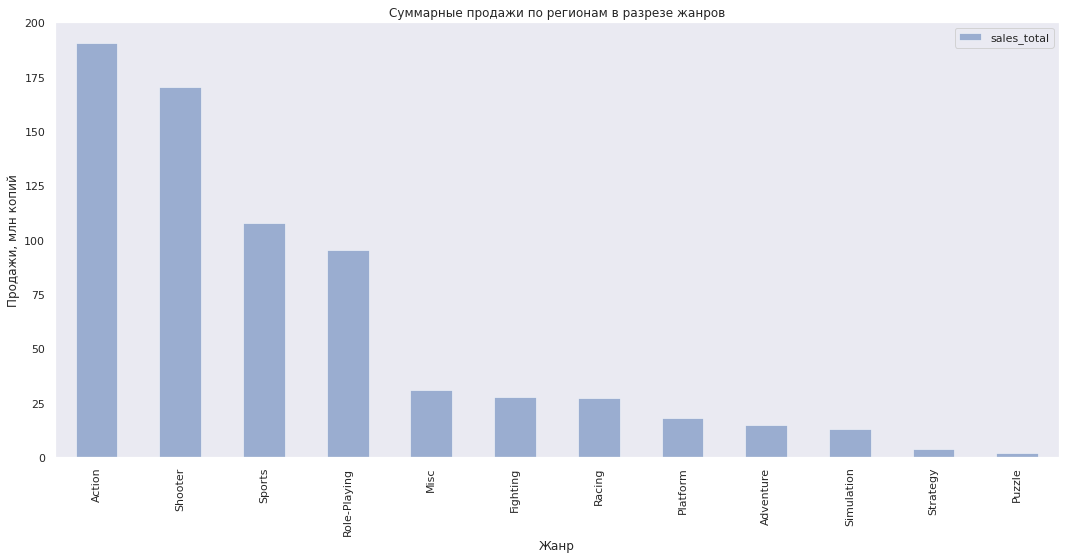

In [57]:
fig, ax = plt.subplots()

(platform_top.groupby('genre')[['sales_total']].agg('sum').sort_values(by ='sales_total', ascending=False)
 .plot(kind='bar',stacked=True, ax=ax, alpha=0.5))
ax.set_title('Суммарные продажи по регионам в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

В топе популярных жанров игр вошли:

    на 1 месте - Action
    на 2 месте - Shooter
    на 3 месте - Sports
    на 4 месте - Role-Playing
    на 5 месте - Misc
    на 6 месте - Fighting
    
Жанры Racing 7 место, Platform 8 место, Adventure 9 место менее популярны

Simulation 10 место 

Совсем не популярен жанры Puzzle 12 и Strategy 11

**Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр.**

**Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Action.**

**Чтобы проверить это - построим аналогичный график для среднего количества продаж:**

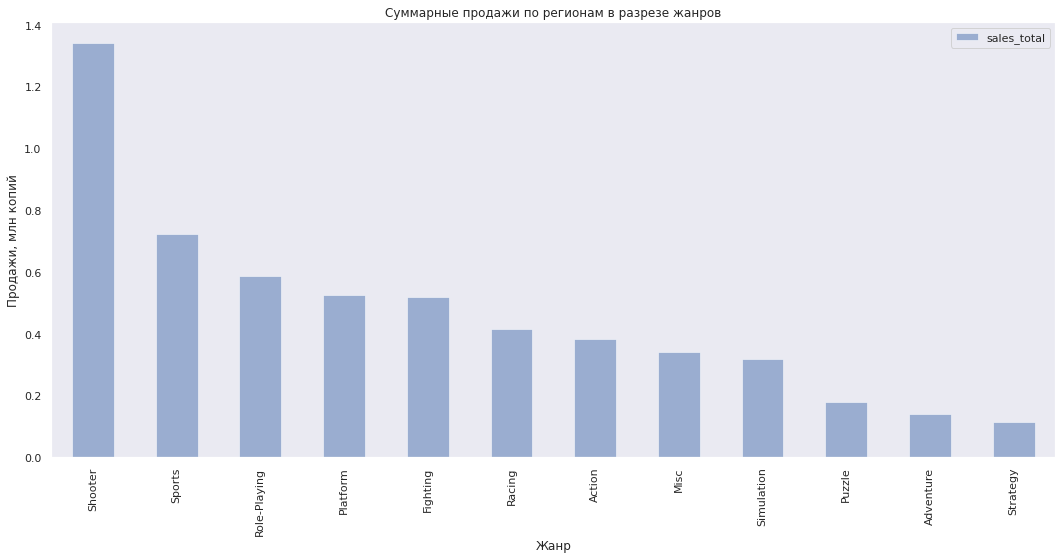

In [58]:
fig, ax = plt.subplots()

(platform_top.groupby('genre')[['sales_total']].agg('mean').sort_values(by ='sales_total', ascending=False)
 .plot(kind='bar',stacked=True, ax=ax, alpha=0.5))
ax.set_title('Суммарные продажи по регионам в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

В топе популярных жанров игр по средней арифмитической вошли:

    на 1 месте - Shooter вместо Action по сумме продаж
    на 2 месте - Sports вместо Shooter
    на 3 месте - Platform вместо Sports
    на 4 месте - Fighting вместо Role-Playing 
    на 5 месте - Role-Playing вместо Misc
    на 6 месте - Racing вместо Fighting 
    
Жанры Misc 7 место, 8 место Action менее популярны хотя в сумме продаж были в топ 5

Simulation 9 место больше популярен в Европе;

Puzzle 10 место хотя в сумме продаж был на 12 месте самых непопулярных

Совсем не популярны жанры Adventure 11 место и Strategy 12 место

### Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

    Самые популярные платформы (топ-5). Опишите различия в долях продаж.

    Самые популярные жанры (топ-5). Поясните разницу.

    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5) За последние 5 лет

In [59]:
# Функция для прорисовки графиков top_in_regions_plot:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = platform_top.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Продажи Северной Америки', 'eu_sales': 'Продажи Европы', 'jp_sales': 'Продажи Япония'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'green', 'jp_sales': 'red'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

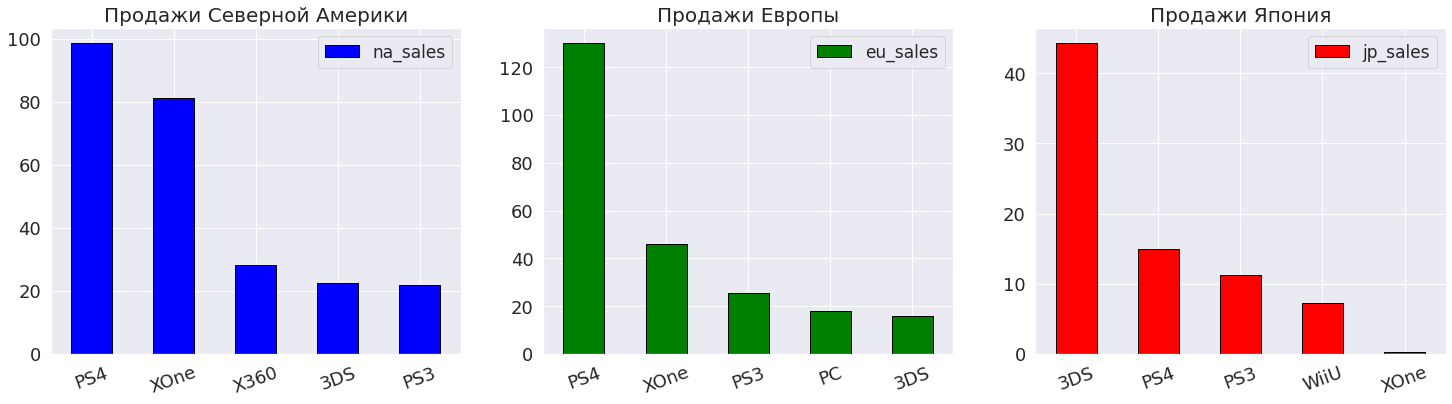

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Америке самая популярная платформа PS4 , далее XOne > X360 > 3DS > PS3

В Европе самая популярная платформа PS4 , далее XOne > PS3 > PC > 3DS

В Японии самая популярная платформа 3DS , далее PS4 > PS3 > WiiU > XOne

#### Самые популярные жанры (топ-5) За последние 5 лет

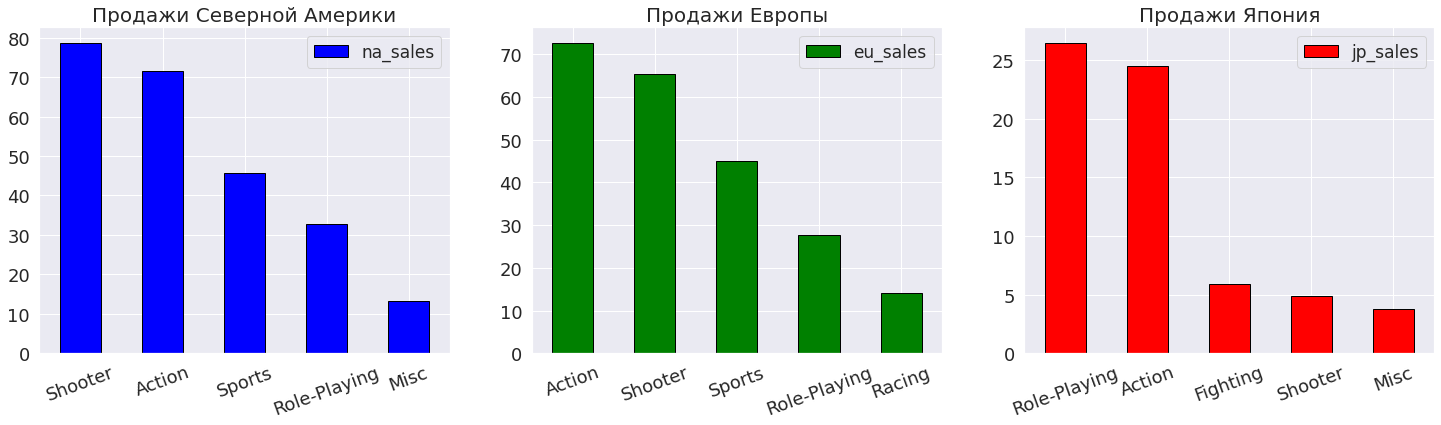

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В Америке самый популярный жанр Shooter , далее Action > Sports > Role-Playing > Misc

В Европе самый популярный жанр Action , далее Shooter > Sports > Role-Playing > Racing

В Японии самый популярный жанр Role-Playing , далее Action > Fighting > Shooter > Misc

#### влияние рейтинга ESRB на продажи

Добавим новый столбец в основной датафрейм с разъяснением, какая буква рейтинга что означает:

In [62]:
ESRB_dict = {'E': 'Все', 'M': 'Зрелые 17+', 'T': 'Подростки 13-19 лет', 'E10+': '>10 лет', 'NOR': 'Нет рейтинга'}

In [63]:
platform_top.loc[platform_top['rating'] != "0", 'ESRB_description'] = platform_top.loc[platform_top['rating'] != "0", 'rating'].map(ESRB_dict)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


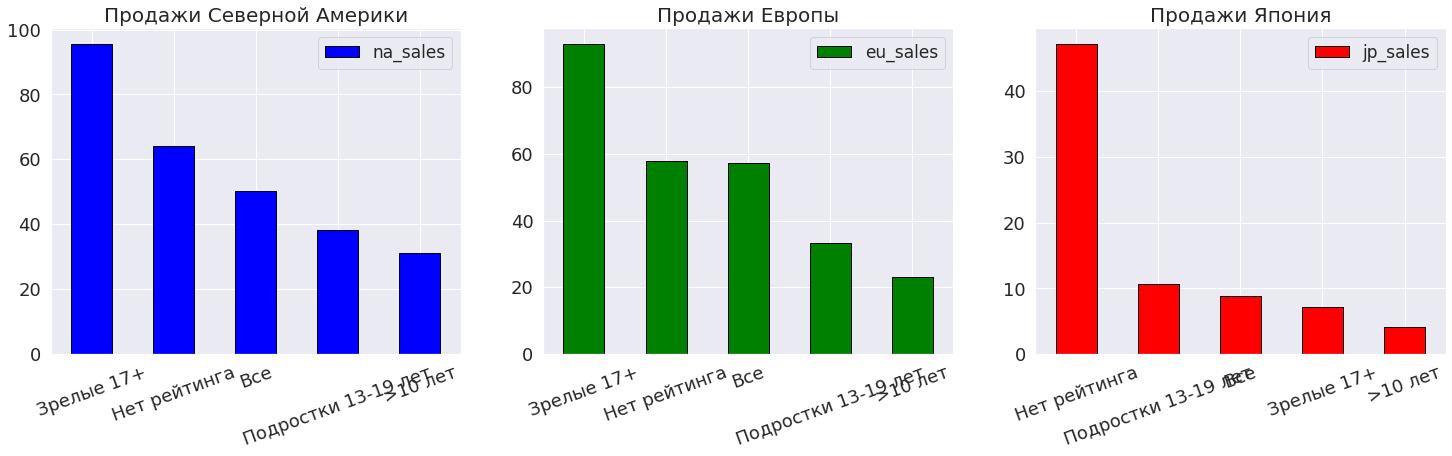

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В Америке и Европе одинаковые предпочтения по рейтингам возрастов:
    
     1. Зрелые 17+
     2. Нет рейтинга
     3. Все
     4. Подростки 13-19 лет
     5. Все старше 10 лет

В Японии:

     1. Нет рейтинга
     2. Подростки 13-19 лет
     3. Все
     4. Зрелые 17+
     5. Все старше 10 лет
     
Интересно, что нет рейтинга на 1 месте, есть предположение что это рейтинг - RP – Оценка ожидается, но контент, скорее всего, предназначен для людей старше 17 лет.

Япония вероятно пользуется другой оценкой и поэтому у нее нет этого рейтинга...

В Целом больше всего игр покупают взрослые и подростки, а также игры с рейтингом для всех и это относится ко все регионам.

### Общий вывод по Этапам 3-4:

Мы рассмотрели сколько выпускалось игр по годам от 1980 года до 2016, где выяснили:
        
    Мир игр меняется резко и быстро.

    Качество игр становится лучше с каждым годом.

    Актуальны будут данные начиная с 2014 года
    
    Перспективными платформами являются PS4, PS3, XOne, X360, WiiU, 3DS, PC
    
    С увеличением рейтинга критиков увеличивается и средний уровень продажи игр, что логично:
    чем качественнее игра, тем больше денег она приносит разработчику и издателю.
    
    Рассчитали зависимость на платформе PS4 продажи и отзывов критиков и пользователей:
    Больше всего на продажи влияет оценка критиков 0.43, меньше всего оценка пользователей 0.14
    
    У остальных платформ тоже корреляция меньше 0.3 или даже меньше 0.1

    Но у платформы WiiU показатели корреляции критиков и пользователей примерно одинаковы 0.29 и 0.26 соответственно
    
    Выяснили самые популярные платформы в разрезе регионов:
    
    В Америке самая популярная платформа PS4 , далее XOne > X360 > 3DS > PS3

    В Европе самая популярная платформа PS4 , далее XOne > PS3 > PC > 3DS

    В Японии самая популярная платформа 3DS , далее PS4 > PS3 > WiiU > XOne
    
    Выяснили самые популярные жанры в разрезе регионов:
    
    В Америке самый популярный жанр Shooter , далее Action > Sports > Role-Playing > Misc

    В Европе самый популярный жанр Action , далее Shooter > Sports > Role-Playing > Racing

    В Японии самый популярный жанр Role-Playing , далее Action > Fighting > Shooter > Misc
    
    В Целом больше всего игр покупают взрослые и подростки, а также игры с рейтингом для всех и это относится ко все регионам.

### Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Задайте самостоятельно пороговое значение alpha.

Поясните:

    Как вы сформулировали нулевую и альтернативную гипотезы;
    Какой критерий применили для проверки гипотез и почему.


#### Гипотеза № 1:

Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые:

    Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Уровень значимости: 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

У нас разные по размеру выборки (отзывов пользователей PC в четыре раза больше, чем пользователей платформы XOne). Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind, так же мы будем использовать параметр equal_var=False, т.к есть сомнения по равнозначности выборок.

Если p-value будет меньше выбранного уровня значимости, то нулевую гипотезу о равенстве средних отвергнем. 
В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [65]:
display(platform_top.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score'))

# удаляем 0

xone = platform_top[(platform_top['platform'] == 'XOne') & (platform_top['user_score'] > 0)]['user_score']
pc = platform_top[(platform_top['platform'] == 'PC') & (platform_top['user_score'] > 0)]['user_score']

,user_score
platform,
PC,5.088742
XOne,4.772368


In [66]:
alpha = 0.05 # критический уровень статистической значимости


results = st.ttest_ind(xone, pc, equal_var=False)
print('p-значение: ', results.pvalue)    # тест двухсторонний
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу

Равенство средних значений статистически значимо: средние пользовательские рейтинги Xbox One и PC одинаковы.

Действительно,если их округлить.

#### Гипотеза № 2:

Средние пользовательские рейтинги жанров Action и Sports разные:
    
    Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
    Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [67]:
display(platform_top.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score'))

# убираем 0

action = platform_top[(platform_top['genre'] == 'Action') & (platform_top['user_score'] > 0)]['user_score']
sports = platform_top[(platform_top['genre'] == 'Sports') & (platform_top['user_score'] > 0)]['user_score']

,user_score
genre,
Action,3.641532
Sports,4.297987


In [68]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(action, sports, alternative='greater')

print('p-значение: ', results.pvalue)    # тест двухсторонний
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.0945288911258353e-17
Отвергаем нулевую гипотезу


Придется отвергнуть нулевую гипотезу.
Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports отличаются между собой. Действительно, если их округлить, то они не равны друг другу.

### Общий вывод

Чтобы начать основной анализ нам необходимо было обработать данные так, что можно было с ними работать:
    
   Этап предобработки данных:
    
        1. Строки с пропуском имени были удаленны, так же как и строки с пропуском жанра.
        2. Пропуски в столбце rating были замененны на NOR, что означает что рейтинга нет или пока нет.
        3. Пропуски в столбцах critic_score и user_score были заменены на нулевые, что означает, что нет оценки.
        4. Пропуски в столбце year_of_release заменены на 0.
        5. Типы данных в столбцах были изменены там где это нужно.
        6. Создан новый столбец 'sales_total'с суммой продаж по всем регионам.
        7. Найдены и удалены дубликаты.
        
   Этап исследовательского анализа данных, рассказал нам больше о данных и связях:
   
   Мы рассмотрели сколько выпускалось игр по годам от 1980 года до 2016, где выяснили:
        
    Мир игр меняется резко и быстро.

    Качество игр становится лучше с каждым годом.

    Актуальны будут данные начиная с 2014 года
    
    Перспективными платформами являются PS4, PS3, XOne, X360, WiiU, 3DS, PC
    
    С увеличением рейтинга критиков увеличивается и средний уровень продажи игр, что логично:
    чем качественнее игра, тем больше денег она приносит разработчику и издателю.
    
    Рассчитали зависимость на платформе PS4 продажи и отзывов критиков и пользователей:
    Больше всего на продажи влияет оценка критиков 0.43, меньше всего оценка пользователей 0.14
    
    У остальных платформ тоже корреляция меньше 0.3 или даже меньше 0.1

    Но у платформы WiiU показатели корреляции критиков и пользователей примерно одинаковы 0.29 и 0.26 соответственно
    
    Выяснили самые популярные платформы в разрезе регионов:
    
    В Америке самая популярная платформа PS4 , далее XOne > X360 > 3DS > PS3

    В Европе самая популярная платформа PS4 , далее XOne > PS3 > PC > 3DS

    В Японии самая популярная платформа 3DS , далее PS4 > PS3 > WiiU > XOne
    
    Выяснили самые популярные жанры в разрезе регионов:
    
    В Америке самый популярный жанр Shooter , далее Action > Sports > Role-Playing > Misc

    В Европе самый популярный жанр Action , далее Shooter > Sports > Role-Playing > Racing

    В Японии самый популярный жанр Role-Playing , далее Action > Fighting > Shooter > Misc
    
    В Целом больше всего игр покупают взрослые и подростки, а также игры с рейтингом для всех и это относится ко все регионам.
    
   Так же, мы проверили две гипотезы, заявленные в самом начале исследования. 

В результате этого:

Средние пользовательские рейтинги Xbox One и PC одинаковы (равенство средних значений статистически значимо);

Средние значения пользовательских оценок игр двух жанров Action и Sports отличаются между собой (различие средних значений статистически значимо);